# Total 311 reports Information
## Purpose
311 is a non-emergency service provided by most cities that has the goal of allowing 911 lines to stay open. Through this, many people will report abondoned cars, obscured sidewalks, or broken publicly funded equipment. The main idea of this analysis is to assume that neighborhoods with **higher** 311 calls shows a community that cares more.

## Imports
This is the basic packages that are needed to analyze the sata set

In [4]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

## Import Data Set
This is simply taking the correct .csv file and importing it. This will be refered to as the "Data Set"

In [5]:
three_one_one = pd.read_csv("311_Reports.csv")

## Start Organization
### Limits
The first thing that needed to be done was removing useless information in reagrds to request types. In this case, it was any "thank you" messages (which after review all contained the word 'Thank') and this was removed to not clutter offical 311 reports.

In [6]:
query_mask = three_one_one['REQUEST_TYPE'].str.contains("Thank") == False

three_one_one = three_one_one[query_mask]
df = pd.DataFrame({
    'neighborhood':three_one_one['NEIGHBORHOOD'],
    'request_type':three_one_one['REQUEST_TYPE'],
})
df

,neighborhood,request_type
0,Central Northside,Street Obstruction/Closure
1,South Side Flats,Graffiti
2,Troy Hill,Litter
3,Banksville,Water Main Break
4,East Hills,Guide Rail
...,...,...
606637,NaN,Referral
606638,NaN,Illegal Parking
606639,NaN,Referral
606640,Carrick,Potholes


### Counting
The next thing that needs to be done is counting and creating a new dataframe. what this is doing is trimming the data set given into easy to understand columns and rows. This allows for better control and comprehension of the material given.

In [7]:
organized_data = df.groupby(["neighborhood"]).size().to_frame().reset_index().rename(columns={0:"count"})
organized_data.sort_values("count", axis = 0, ascending = False, inplace = True, na_position ='last')
print(organized_data.head(5))

           neighborhood  count
13            Brookline  24894
15              Carrick  23480
77  Squirrel Hill South  20183
73    South Side Slopes  19598
72     South Side Flats  18044


### Graph
The goal of the graph below is to quickly understand how the data frame (above) is distributed. Graphs tend to be a helpful aid in undertsanding raw data, and the best example was a bar graph for a large data set like this.

<Figure size 432x288 with 0 Axes>

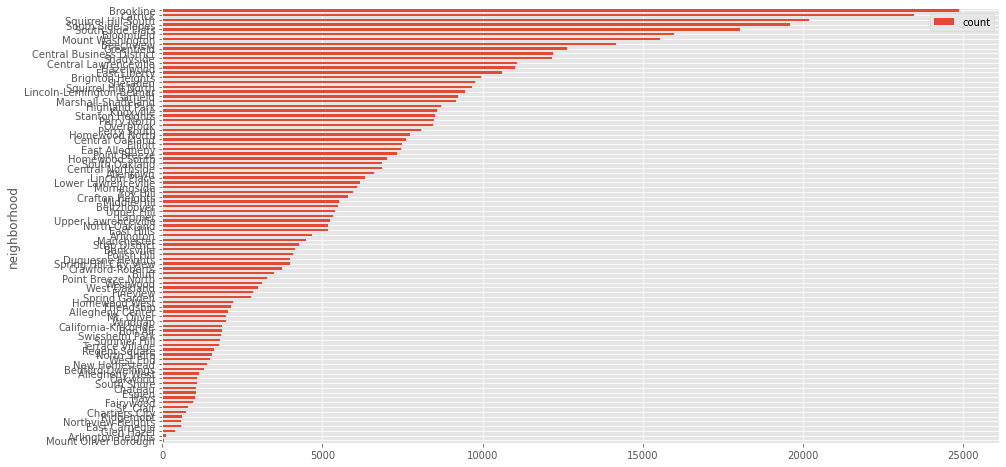

In [8]:
plt.tight_layout()
plt.style.use("ggplot")
plottable_values = organized_data[organized_data["count"] > 0].sort_values("count")
plottable_values.plot.barh(x="neighborhood",y="count",figsize=(15,8))
plt.savefig("chart.png")

### Heat Map
#### Test Files
This is simply testing the Map Files given to us for the basic region of Pittsburgh.

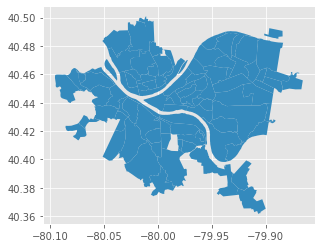

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

#### Test Data Set
This is the merge between both the test files and the data frame, which allows for a basic heat map to be produced

In [10]:
heat_map = neighborhoods.merge(organized_data, how='left', left_on='hood', right_on='neighborhood')
heat_map[['hood','count','geometry']].head()


,hood,count,geometry
0,Central Oakland,7622,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,5181,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2984,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3747,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,4283,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


#### Final Heat Map
This is the product of the tests above. As we can see, the neighbor hhoods with the greatest amount of 311 reports are a deep blue and the lowest are nearing a very light green. 

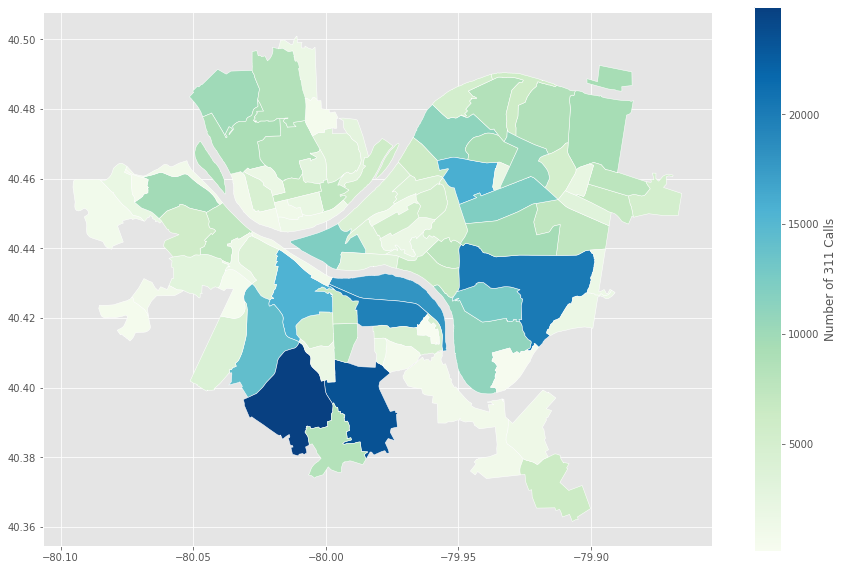

In [46]:
heat_map.plot(column='count', # set the data to be used for coloring
               cmap='GnBu',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of 311 Calls"}, # label the legend
               figsize=(15, 10)         # set the size
               )
plt.savefig("heat_map.png")

## Conclusions


### Summary
Considering all of these factors, the top 5 neighborhoods are Brookline, Carrick, Squirrl Hill South and South Side (slopes & flats). With this, at the bottom of the list is Mount Oliver, Arlington, Glen Hazel, East Carnegie, and Northview Heights. From this, I would not say the data set is very accurate (although I was born in Brookline and am biased). It is also important to note how popular 311 reports are, with the data being 604,448 viable points. This massive amount of information could be broken up more, but for this it was a baseline of what neighborhoods make the most reports. 

### Issues and Future Studies
The issues with this data set are fairly apparent, as the 311 is not an optimal metric for learning about a neighborhoods safety or quality. What could be done in future studies is break down different types and styles of 311 reports and compair them to each other. 

In [12]:
organized_data = df.groupby(["neighborhood"]).size().to_frame().reset_index().rename(columns={0:"count"})
organized_data.sort_values("count", axis = 0, ascending = True, inplace = True, na_position ='last')
print(organized_data.head(5))

            neighborhood  count
52  Mount Oliver Borough     61
4      Arlington Heights    128
35            Glen Hazel    391
26         East Carnegie    570
58     Northview Heights    574
